# Exercise 4

**_DISCLAIMER:_** The notation used in this exercise follows the one of the Probabilistic Robotics book (refer to Chapter 5.4 in case you have doubts).

## 4.1 Inverse motion model

The odometry model uses the _relative motion information_. The odometry readings are $u_t = [{\overline{x}}_{t-1} , {\overline{x}}_{t}]$, where $\overline{x}_{t-1}$ and  $\overline{x}_t$ are poses in a robot-internal coordinate frame (different from the map).

The function `inverse_motion_model` takes as input an odometry reading $u_t$ that consist in:

- the initial pose of the robot in the **odometry** coordinate frame $\overline{x}_{t-1} = [\overline{x},\overline{y},\overline{\theta}]$
- the estimated pose of the robot in the **odometry** coordinate frame $\overline{x}_t = [\overline{x}',\overline{y}',\overline{\theta}']$

The output is the relative motion $\delta_{rot1}, \delta_{trans}, \delta_{rot2}$.

Implement the function `inverse_motion_model` and verify that it is correct for some test input. **[2.0]**

In [1]:
import numpy as np

from ex4 import inverse_motion_model # Computes the probability of x_t, ~p(x_t | u_t, x_t-1)

theta = np.pi * 0.5
x_prev = np.array([ 0, 0, -theta ])
x_next = np.array([ 2, 0, theta ])
odometry = np.array([ x_prev, x_next ])

rot1, trans, rot2 = inverse_motion_model(odometry)

print(f'{rot1}\n\n{trans}\n\n{rot2}')

1.5708

2.0

1.5708


## 4.2 Odometry-based motion model

The function `motion_model_odometry` computes the posterior $p(x_t | u_t, x_{t-1})$ from odometry readings.

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the hypothesized (or query) final pose $x_{t} = [x', y', \theta']$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is the probability $p(x_t | u_t, x_{t-1})$

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [1.0, 1.0, 0.01, 0.01]$.

The robot excecutes one motion command and the odometry readings are:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$

Implement the `motion_model_odometry` function and verify that it is correct for some test input. **[1.0]**

---

Consider a 150x150 grid map the world with a resolution of 0.01, centered in the original position of the robot.

Plot the posterior $p(x_t | u_t, x_{t-1})$ for all possible $[x, y]$ values from the grid. **[2.0]**

**Note that** the query input is a position (**map** coordinates), not a pose. Therefore, to plot the posterior belief over the gridmap, you can assume the term $\hat{\delta}_\mathrm{rot2}$ to be zero and, for each position, integrate over all possible orientations. This can be implemented by considering $p_3 = 1.0$ in the equations. 

In [2]:
from ex4 import motion_model_odometry

theta = np.pi * 0.5
x_prev = np.array([ 0.0, 0.0, 0.0 ])
x_next = np.array([ 0.5, 0.0, theta ])
odometry = np.array([ x_prev, x_next ])

pose_prev = np.array([ 2.0, 3.0, 0.0 ])
pose_next = np.array([ 2.5, 3.0, theta ])
pose = np.array([ pose_prev, pose_next ])
prob = motion_model_odometry(pose, odometry, np.array([ 1.0, 1.0, 0.01, 0.01 ]))

print(f'p(x_t | u_t, x_t-1)= { round(prob, 4) * 100.0 }%')

p(x_t | u_t, x_t-1)= 88.39%


Grid => 150x150
(15000, 15000)


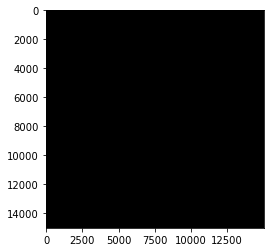

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from ex4 import motion_model_odometry_with_map

m, n = (150, 150)
print(f'Grid => {m}x{n}')

step = 0.01
rows = int(np.ceil(m / step))
cols = int(np.ceil(n / step))
gridmap = np.zeros(shape=( rows, cols ))

print(gridmap.shape)

plt.imshow(gridmap, cmap='gray')

#prob_map = motion_model_odometry_with_map(pose_prev, u_t, gridmap, np.array([ 1.0, 1.0, 0.01, 0.01 ]))
#plt.imshow(prob_map)

## 4.3 Sample odometry motion model

The `motion_model_odometry` requires high computation complexity and does not scale well to large real-world environments. 

One effective approach to approximate $p(x_t | u_t, x_{t-1})$ is to use **sampling**.

The `sample_motion_model_odometry` function defines the sampling-based odometry motion model. 

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is a new (sampled) pose predicted by the motion model.

Implement the `sample_motion_model_odometry` function and verify that it is correct for some test input. **[2.0]**

In [4]:
from ex4 import sample_motion_model_odometry

pose = np.array([ 0.0, 0.0, 0.0 ])
odometry = np.array([pose, np.array([ 2, 0, 0.5 * np.pi ])])
alphas = np.array([ 1.0, 1.0, 0.01, 0.01 ])
x_t = sample_motion_model_odometry(pose, odometry, alphas)

print(x_t)

[1.79758424 0.93477525 1.55871978]


## 4.4 Evaluate sample odometry motion model

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [0.1, 0.1, 0.01, 0.01]$.

The robot obtains the following odometry readings:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$
3. $\overline{x}_2 = [0.5 , 0.5 , 0.0   ]$
4. $\overline{x}_3 = [1.0 , 0.5 , 0.0   ]$
5. $\overline{x}_4 = [1.0 , 1.5 , \pi/2 ]$
6. $\overline{x}_5 = [1.0 , 2.5 , \pi/2 ]$

Evaluate the `sample_motion_model_odometry` by considering 1000 samples and plot the resulting positions for each sample in one unique plot. **[3.0]**

Pose: [2. 3. 0.]
Pose: [2.5    3.     1.5708]
Pose: [2.49999816 3.5        0.        ]
Pose: [2.99999816 3.5        0.        ]
Pose: [2.99999449 4.5        1.5708    ]
Pose: [2.99999082 5.5        1.5708    ]


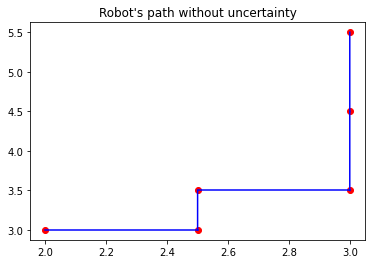



Odometry reading: [0.5        0.         1.57079633]
Next pose: [2.5    3.     1.5708]
Odometry reading: [0.5 0.5 0. ]
Next pose: [2.49999816 3.5        0.        ]
Odometry reading: [1.  0.5 0. ]
Next pose: [2.99999816 3.5        0.        ]
Odometry reading: [1.         1.5        1.57079633]
Next pose: [2.99999449 4.5        1.5708    ]
Odometry reading: [1.         2.5        1.57079633]
Next pose: [2.99999082 5.5        1.5708    ]


(5000,)
(5000,)


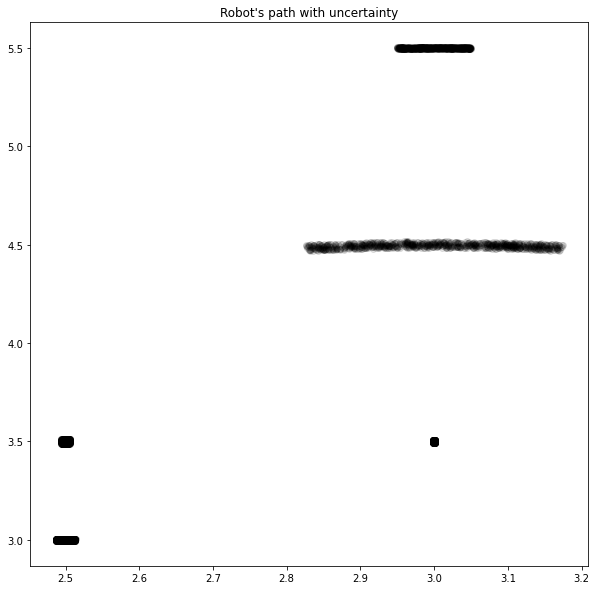

In [8]:
from ex4 import sample_motion_model_odometry

pose = np.array([ 2.0, 3.0, 0.0 ]) # map coordinates
alphas = np.array([ 0.1, 0.1, 0.01, 0.01 ])

sample_size = 1000

half_pi = 0.5 * np.pi
odometry = np.array([
    [ 0.0, 0.0, 0.0 ],
    [ 0.5, 0.0, half_pi ],
    [ 0.5, 0.5, 0.0 ],
    [ 1.0, 0.5, 0.0 ],
    [ 1.0, 1.5, half_pi ],
    [ 1.0, 2.5, half_pi ]
])

def move(pose_prev, rot1, trans, rot2):
    pose[0] += trans * np.cos(pose[2] + rot1)
    pose[1] += trans * np.sin(pose[2] + rot1)
    pose[2] += rot1 + rot2
    return pose

print(f'Pose: {pose}')
plt.title('Robot\'s path without uncertainty')
plt.scatter(*pose[:-1], c='red')
for idx in range(1, len(odometry)):
    pose_prev = np.copy(pose)
    rot1, trans, rot2 = inverse_motion_model(np.array([ odometry[idx - 1], odometry[idx] ]))
    pose = move(pose, rot1, trans, rot2)
    print(f'Pose: {pose}')
    plt.scatter(*pose[:-1], c='red')
    plt.plot([pose_prev[0], pose[0]], [pose_prev[1], pose[1]], c='blue')
plt.show()

print('\n')

pose = np.array([ 2.0, 3.0, 0.0 ])
pnts = []
for idx in range(1, len(odometry)):
    print(f'Odometry reading: {odometry[idx]}')
    for _ in range(sample_size):
        pose_next = sample_motion_model_odometry(pose, np.array([ odometry[idx - 1], odometry[idx] ]), alphas)
        pnts.append([*pose_next[:-1]])
    rot1, trans, rot2 = inverse_motion_model(np.array([ odometry[idx - 1], odometry[idx] ]))
    pose = move(pose_prev, rot1, trans, rot2)
    print(f'Next pose: { pose }')
    
print('\n')

pnts = np.array(pnts)
print(pnts[:, 0].shape)
print(pnts[:, 1].shape)

plt.figure(figsize=(10, 10))
plt.title('Robot\'s path with uncertainty')
plt.scatter(pnts[:, 0], pnts[:, 1], color='black', alpha=0.1)
plt.show()